In [9]:
import cv2
import os
import time
from PIL import Image
from shutil import copyfile

def process_image(img):
    # clone the frame
    clone = img.copy()
   
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

    # sure background area
    sure_bg = cv2.dilate(opening,kernel,iterations=3)

    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg,sure_fg)

    # Marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)

    # Add one to all labels so that sure background is not 0, but 1
    markers = markers+1

    # Now, mark the region of unknown with zero
    markers[unknown==255] = 0

    markers = cv2.watershed(img,markers)
    img[markers == -1] = [255,0,0]
    
    # thresholdin: Otsu's Binarization method
    #_, thresh = cv2.threshold(edges, 127, 255,
    #                           cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return img
def create_folder(folder_name):
    if not os.path.exists(folder_name):
        os.mkdir(folder_name)

def init_create_folder():
    # create the folder and database if not exist
    if not os.path.exists("Alphabets_224_Seg"):
        os.mkdir("Alphabets_224_Seg")
def perform_conversion(source_path = "Alphabets_224/", dest_path="Alphabets_224_Seg/"):
    try:
        start=time.time()
        sub_folders = os.listdir(source_path)
        sub_folders.sort()
        for folder in sub_folders:
            if not os.path.exists(dest_path+folder):
                os.mkdir(dest_path+folder)
            img_list = os.listdir(source_path+folder+"/")
            for img_ in img_list:
                img = cv2.imread(source_path+folder+"/"+img_)
                img = process_image(img)
                img_name= dest_path+folder+"/"+img_
                cv2.imwrite(img_name, img)
        end=time.time()
        print("----Conversion Successful----")
        print("Files Saved to :",dest_path)
        print("Time Elapsed :{} sec".format(end-start))
    except Exception as e:
        print("Something Happened :",e)

        
init_create_folder()
perform_conversion()

----Conversion Successful----
Files Saved to : Alphabets_224_Seg/
Time Elapsed :441.23080372810364 sec


In [4]:
import numpy as np
from matplotlib import pyplot as plt

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0


markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

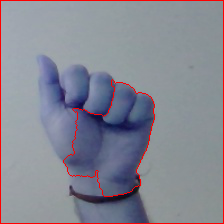

In [5]:
Image.fromarray(img)